<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 6> Lic. Ingeniería Financiera </font> <br> <br> <font color= #AABCBB> <font size = 4>I.F. Karen Violeta García Hernandez - if707178@iteso.mx </font>

<center><font color=#50C8C4><font size=5> Laboratorio 0: Herramientas Computacionales </font> <br> <br>

<center> <font color= #004A94 > <font size = 4> Primavera 2020 </font>  |  <font color= #004A94> <font size = 4> Repositorio: <a href='https://github.com/violetarcia/LAB_0_KVGH.git'>Link</a></font>

---

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Resumen </span></div>


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Este laboratorio sirve para generar nueva información de los precios a partir de los históricos en formato  OHLC (Open, High, Low, Close). Esta nueva información generada, la mayoría almacenada como nuevas columnas dentro del DataFrame que contiene los precios históricos OHLC, puede ser utilizada también como "variables explicativas" en modelos predictivos (ya sean de regresión o de clasificación). El enfóque de los cálculos que deberás de realizar para este laboratorio es "estadístico" utilizando información de las "velas".  También vas a poner en práctica algunos códigos simples para graficar utilizando la librería de Plotly, todo esto utilizando una lógica de organizar el código con base a "funciones" y scripts separados (algo bastante útil para proyectos aplicados de python). </p>

---

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Código </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> A continuación se desglosa el código con el cual se analiza la divisa eurodólar. Primero se empieza importando paqueterías y archivos que nos serán útiles: </p>

In [1]:
import funciones as fn                              # Para procesamiento de datos
import visualizaciones as vs                        # Para visualizacion de datos
import pandas as pd                                 # Procesamiento de datos
from datos import OA_Ak                             # Importar token para API de OANDA
import matplotlib.pyplot as plt                     # Visualizar graficas básicas
import plotly.express as px

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Después se descargan los precios del eurodólar desde  <a href='https://www1.oanda.com/forex-trading/analysis/economic-indicators/global/forex-rates/eur-usd'>OANDA </a> especificando  tanto temporalidad como fecha inicial y final; teniendo como resultado un DataFrame con la información de precios de Apertura, Máximo, Mínimo y Cierre (Open, High, Low, Close):</p>


In [2]:
# Datos necesarios: token de OANDA
OA_In = "EUR_USD"                   # Instrumento
OA_Gn = "H1"                        # Granularidad de velas
fini = pd.to_datetime("2019-07-06 00:00:00").tz_localize('GMT')  # Fecha inicial
ffin = pd.to_datetime("2019-12-06 00:00:00").tz_localize('GMT')  # Fecha final

# Descargar precios masivos
df_ = fn.f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn, p3_inst=OA_In, p4_oatk=OA_Ak, p5_ginc=4900)

pd.set_option('display.max_rows', 10)
df_pe = df_.copy()

df_pe

,TimeStamp,Open,High,Low,Close
0,2019-07-07 21:00:00+00:00,1.12248,1.12275,1.12240,1.12275
1,2019-07-07 22:00:00+00:00,1.12278,1.12292,1.12256,1.12288
2,2019-07-07 23:00:00+00:00,1.12286,1.12286,1.12266,1.12268
3,2019-07-08 00:00:00+00:00,1.12270,1.12298,1.12198,1.12212
4,2019-07-08 01:00:00+00:00,1.12214,1.12283,1.12210,1.12276
...,...,...,...,...,...
2616,2019-12-05 23:00:00+00:00,1.11043,1.11058,1.11040,1.11040
2617,2019-12-06 00:00:00+00:00,1.11042,1.11055,1.11030,1.11030
2618,2019-12-06 01:00:00+00:00,1.11033,1.11070,1.11033,1.11065
2619,2019-12-06 02:00:00+00:00,1.11068,1.11086,1.11066,1.11076


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Una vez descargados los datos, se grafican con la ayuda del archivo de visualizaciones que se importó anteriormente. Dando como resultado una <a href='https://mercadoforex.net/grafico-velas'> gráfica de velas</a>, la cual muestra información del precio de apertura, cierre, máximo y mínimo, utilizando asimismo colores que representan si el precio de cierre fue mayor o menor que el precio de apertura.</p>

In [3]:
# Grafica de velas
vs_grafica1 = vs.g_velas(p0_de=df_pe.iloc[0:120, :])
vs_grafica1.show()

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Se empieza a extraer información que puede ser relevante de las series de tiempo, empezando por la hora, la cual, como la mayoría de las características que se obtienen, se hace utilizando una comprensión de listas.</p>

**Hora de la vela**

* <p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> La hora expresada en formato de 24hrs, en la que ocurrió la vela. </p>


In [4]:
# -- 0A.1: Hora
df_pe['Hour'] = [df_pe['TimeStamp'][i].hour for i in range(0, len(df_pe['TimeStamp']))]

**Dia de la semana de la vela**

* <p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Día de la semana en formato numérico (0 = domingo, 1 = lunes, etc), en el que ocurrió la vela. </p>


In [5]:
# -- 0A.2: Dia de la semana.
df_pe['Day'] = [df_pe['TimeStamp'][i].weekday() for i in range(0, len(df_pe['TimeStamp']))]

**Boxplot de amplitud de velas (close - open)**

* <p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Diagrama de caja y bigote para visualizar la dispersión de los "pips" de diferencia entre el precio Close y el precio Open de cada vela. También para resaltar los atípicos de los datos utilizados. </p>

In [6]:
# Multiplicador de precios
pip_mult = 10000

# -- 0B: Boxplot de amplitud de velas (close - open).
df_pe['CO'] = (df_pe['Close'] - df_pe['Open'])*pip_mult

# -- Graficar Boxplot plotly -- #
vs_grafica2 = vs.g_boxplot_varios(p0_data=df_pe[['CO']], p1_norm=False)
vs_grafica2.show()

**Mes de la vela**

* <p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Utilizando la columna de TimeStamp se calcula el "Mes" en el que ocurrió la vela. </p>


In [7]:
# -- 1pt: Mes en el que ocurrio la vela
df_pe['Month'] = [df_pe['TimeStamp'][i].month for i in range(0, len(df_pe['TimeStamp']))]

**Sesion de la vela**

* <p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Sesión bursátil en la que ocurrió la vela,  el valor dentro de la columna deberás de colocarlo siguiendo la siguiente regla: </p>

|  Zona             |   Hora|
|---	            |:-:	|
|  `Asia`           |   22, 23, 0, 1, 2, 3, 4, 5, 6, 7	|
|  `Asia_Europa` 	|   8	|
|  `Europa` 	    |   9, 10, 11, 12 	|
|  `Europa_America` |   13, 14, 15, 16	|
|  `America` 	    |   17, 18, 19, 20, 21	|


**<p style = "font-family: Calibri Light; font-size:1.0em;color:gray; LINE-HEIGHT:25px"> Recuerda que el 'TimeStamp' de los precios que están descargándose en el código está en huso horario UTC, así que no aplicará a las horas de Guadalajara", sino, a las horas de cualquier centro bursátil que esté bajo el huso horario UTC, como lo es el caso de Londres que tiene huso horario GMT = 0. </p>**



In [8]:
# -- 1pt: Sesion
# Función con las condiciones antes dadas, de acuerdo a la hora se le asigna una zona donde ocurrio tal precio
def sesion_vela(hora):
    if hora in [22, 23, 0, 1, 2, 3, 4, 5, 6, 7]:
        ans = 'asia'
    elif hora == 8:
        ans = 'asia_europa'
    elif hora in [9, 10, 11, 12]:
        ans = 'europa'
    elif hora in [13, 14, 15, 16]:
        ans = 'europa_america'
    else:
        ans = 'america'
    return ans

In [9]:
# Utilizar la función en una comprensión de listas para las horas de las velas y agregarlo al DataFrame
df_pe['Sesion'] = [sesion_vela(df_pe['Hour'][i]) for i in range(len(df_pe['Hour']))]

**Amplitud de vela (en pips).**

* <p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Calcular la diferencia entre las columnas Open y Close, expresarla en pips. </p>


In [10]:
# -- 1pt: OC (Open-Close)
df_pe['OC'] = (df_pe['Open'] - df_pe['Close'])*pip_mult

**Amplitud de extremos (en pips).**

* <p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Calcular la diferencia entre las columnas High y Low, expresarla en pips. </p>


In [11]:
# -- 1pt: HL (High-Low)
df_pe['HL'] = (df_pe['High'] - df_pe['Low'])*pip_mult

**Sentido de la vela (alcista o bajista)**

* <p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> En esta columna debes de asignarle el valor de 'alcista' para cuando Close >= Open y 'bajista' en el caso contrario. </p>


In [12]:
# -- 0.5pt: Sentido (Tendencia)
df_pe['Tendency'] = ['alcista' if df_pe['Close'][i] >= df_pe['Open'][i] else 'bajista' for i in range(len(df_pe['Open']))]

**Conteo de velas consecutivas alcistas/bajistas.**

* <p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> En el DataFrame de los precios OHLC, para cada renglon, ir acumulando el valor de velas consecutivas ALCISTAS o BAJISTAS e ir haciendo el conteo de ocurrencia para cada caso. Se comienza el conteo a partir de la primera repetición, por ejemplo, ['sentido_c'] tendrá un 2  en el tiempo t cuando en el tiempo t-2 y tiempo t-1 haya sido el mismo valor que en el tiempo t. En este ejemplo ['sentido_c'] tendría un 2 (en el tiempo t-2 fue la primera vela, y la vela en tiempo t-1 y en tiempo t fueron 2 velas fueron consecutivamente en el mismo sentido). </p>

In [13]:
# -- 0.5pt: Sentido_c (Contar la consecutividad que hay en las tendencias)
# Primero creando una funcion sencilla que cuente si 'a' (t1) es igual a 'b' (t2), sumar uno, de lo contrario reiniciar
def conteo(count, a, b):
    if a == b:
        count += 1
    else:
        count = 0
    return  count

count = [0]

In [14]:
# Hacer uso de la función, con una comprension de listas
temp = [count.append(conteo(count[i], df_pe['Tendency'][i], df_pe['Tendency'][i+1])) for i in range(len(df_pe['Tendency'])-1)]
df_pe['Count'] = count

In [15]:
# Visualizar el DataFrame, al haber agregado todo lo anterior
df_pe


,TimeStamp,Open,High,Low,Close,Hour,Day,CO,Month,Sesion,OC,HL,Tendency,Count
0,2019-07-07 21:00:00+00:00,1.12248,1.12275,1.12240,1.12275,21,6,2.7,7,america,-2.7,3.5,alcista,0
1,2019-07-07 22:00:00+00:00,1.12278,1.12292,1.12256,1.12288,22,6,1.0,7,asia,-1.0,3.6,alcista,1
2,2019-07-07 23:00:00+00:00,1.12286,1.12286,1.12266,1.12268,23,6,-1.8,7,asia,1.8,2.0,bajista,0
3,2019-07-08 00:00:00+00:00,1.12270,1.12298,1.12198,1.12212,0,0,-5.8,7,asia,5.8,10.0,bajista,1
4,2019-07-08 01:00:00+00:00,1.12214,1.12283,1.12210,1.12276,1,0,6.2,7,asia,-6.2,7.3,alcista,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,2019-12-05 23:00:00+00:00,1.11043,1.11058,1.11040,1.11040,23,3,-0.3,12,asia,0.3,1.8,bajista,0
2617,2019-12-06 00:00:00+00:00,1.11042,1.11055,1.11030,1.11030,0,4,-1.2,12,asia,1.2,2.5,bajista,1
2618,2019-12-06 01:00:00+00:00,1.11033,1.11070,1.11033,1.11065,1,4,3.2,12,asia,-3.2,3.7,alcista,0
2619,2019-12-06 02:00:00+00:00,1.11068,1.11086,1.11066,1.11076,2,4,0.8,12,asia,-0.8,2.0,alcista,1


**Ventanas móviles de volatilidad**

* <p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px">Utiliza la columna de 'HL' como una medida de "volatilidad" en pips de las velas. Con esta columna, genera las siguientes columnas haciendo una "ventana móvil" del máximo de esos últimos n valores. Las columnas serán 3, una para cada valor de la "volatilidad móvil" para 5, 25 y 50 velas de histórico respectivamente. </p>

>  <p style = "font-family: Calibri Light; font-size:1.1em;color:black; LINE-HEIGHT:25px"> a) volatilidad_5 : Utilizando la información de las 5 anteriores velas.</p>
>  <p style = "font-family: Calibri Light; font-size:1.1em;color:black; LINE-HEIGHT:25px"> b) volatilidad_25: Utilizando la información de las 25 anteriores velas.</p>
>  <p style = "font-family: Calibri Light; font-size:1.1em;color:black; LINE-HEIGHT:25px"> c) volatilidad_50: Utilizando la información de las 50 anteriores velas.</p>

**<p style = "font-family: Calibri Light; font-size:1.0em;color:gray; LINE-HEIGHT:25px"> Recuerda que la "volatilidad" en una serie de tiempo financiera es, usualmente, la desviación estándar de los rendimientos, sin embargo, uno puedeo proponer otros "estadísticos" para representar la "variabilidad" entre los datos. En este caso, probaremos generar esta información sólo tomando en cuenta la columna ['hl']. Así que, no es necesario calcular rendimientos en esta ocasión. </p>**


In [16]:
# -- 1pt: Ventanas moviles de volatilidad
vol_5  = df_pe['HL'].rolling(window = 5).std()
vol_25 = df_pe['HL'].rolling(window = 25).std() 
vol_50 = df_pe['HL'].rolling(window = 50).std()
#df_pe['Vol_5']

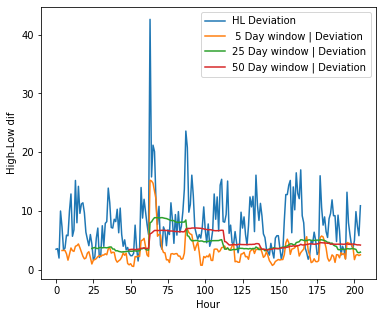

In [17]:
#%matplotlib notebook
d = 205

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1)
ax.plot(df_pe.index[:d], df_pe['HL'][:d], label = 'HL Deviation')

ax.plot(vol_5.index[:d], vol_5[:d], label = ' 5 Day window | Deviation')
ax.plot(vol_25.index[:d], vol_25[:d], label = '25 Day window | Deviation')    
ax.plot(vol_50.index[:d], vol_50[:d], label = '50 Day window | Deviation')

ax.set_xlabel('Hour')
ax.set_ylabel('High-Low dif')
ax.legend(loc='best');
plt.show()

**Gráfica con Plotly**

* <p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Realiza una propuesta de gráfica utilizando alguna de las columnas que has generado y la librería plotly. Las reglas son las siguientes: </p>

>1. Tiene que tener título de gráfica
2. Tiene que tener título de eje x y etiquetas de eje x
3. Tiene que tener título de eje y y etiquetas de eje y
4. Se debe de poder visualizar una leyenda (en cualquier posición).

In [30]:
# -- 1pt: Utilizar Plotly para graficar algo de los datos
correlacion = df_.corr()
fig = px.imshow(correlacion, title = 'Correlacion')
fig.update_layout(xaxis_title = 'data', yaxis_title = 'data')
fig.show()